<a href="https://colab.research.google.com/github/tomiokario/TryGemini/blob/main/TryGemini.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gemini APIを試す
- Bardに使用されるGoogle社の言語モデルGemini ProをGoogle Colab上で動かします．
- 2023/12/24現在，1分間に60リクエストまで無料で呼び出せます．[1]
- このノートブックはGoogle公式ドキュメント[2]やブログ[3]を参考にしています．

**目次**
1. 前準備：API設定と環境構築
2. テキストのみの推論
3. テキストと画像を入力とした推論
4. マルチターンの会話

**参考**
1. [Gemini API Pricing  |  Google AI for Developers](https://ai.google.dev/pricing)
2. [Generative API の概要  |  Google AI for Developers](https://ai.google.dev/docs/gemini_api_overview?hl=ja)
3. [Google Colab で Gemini Pro を試す｜npaka](https://note.com/npaka/n/n166bc3df3abc)


## 1. 前準備：API設定と環境構築

### 1.1. APIキーの登録（手動）

**Google AI StudioからAPIキーを取得**

https://makersuite.google.com/app/apikey からAPIキーを取得する

**Colabのシークレットマネージャーに登録**
- サイドバーの🗝マークを押す
- `GOOGLE_API_KEY`として登録



### 1.2. 環境設定

In [1]:
# パッケージのインストール
!pip install -q -U google-generativeai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.9/146.9 kB 1.6 MB/s eta 0:00:00


In [2]:
# パッケージのインポート
import pathlib
import textwrap
import google.generativeai as genai
from google.colab import userdata
from IPython.display import display
from IPython.display import Markdown

# Markdown出力
def to_markdown(text):
  text = text.replace('•', '  *')
  return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))

# APIキーの読み込み
GOOGLE_API_KEY=userdata.get("GOOGLE_API_KEY")
genai.configure(api_key=GOOGLE_API_KEY)

## 2. テキストのみの推論


In [ ]:
# モデルの準備
model = genai.GenerativeModel('gemini-pro')

In [3]:
# 推論の実行
response = model.generate_content("生成AIとは何ですか？")
to_markdown(response.text)

> 生成AI（Generative AI）とは、自然言語、画像、音声、音楽などの新しいデータを生成する人工知能（AI）のサブ分野です。生成AIは、機械学習、深層学習、強化学習などのAI技術を使用して、新しいコンテンツを作成します。
> 
> 生成AIは、さまざまな分野で応用されています。例えば、自然言語生成AIは、ニュース記事、ブログ記事、小説、詩などを自動的に生成するために使用されています。画像生成AIは、新しい画像やビデオを作成するために使用されており、音声生成AIは、新しい音楽や音声を生成するために使用されています。
> 
> 生成AIは、まだ発展途上の分野ですが、今後、ますます多くの分野で応用されると期待されています。生成AIは、新しいコンテンツの作成を自動化することで、人間の作業負担を軽減し、新しい可能性を生み出す可能性を秘めています。
> 
> 生成AIの具体的な例をいくつか紹介します。
> 
> * 自然言語生成AI：テキストを生成するAIです。ニュース記事、ブログ記事、小説、詩などを自動的に生成することができます。
> * 画像生成AI：画像を生成するAIです。新しい画像やビデオを作成することができます。
> * 音声生成AI：音声を生成するAIです。新しい音楽や音声を生成することができます。
> * 音楽生成AI：音楽を生成するAIです。新しい曲や音楽を自動的に生成することができます。
> * コード生成AI：コードを生成するAIです。新しいプログラムやソフトウェアを自動的に生成することができます。
> 
> 生成AIは、まだ発展途上の分野ですが、今後、ますます多くの分野で応用されると期待されています。生成AIは、新しいコンテンツの作成を自動化することで、人間の作業負担を軽減し、新しい可能性を生み出す可能性を秘めています。

## 3. テキストと画像を入力とした推論



**画像の準備方法**

左サイドバーのフォルダ(📁)から画像をColabにアップロード

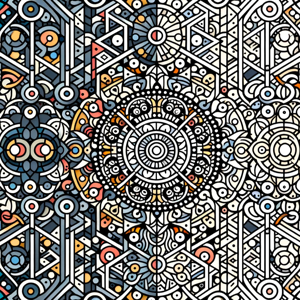

In [10]:
# 画像の読み込み
import PIL.Image
img = PIL.Image.open('image.png')
# 画像の表示
display(img.resize((300,300)))
# モデルの読み込み
model = genai.GenerativeModel('gemini-pro-vision')

In [5]:
# 画像のみでの推論
response = model.generate_content(img)
to_markdown(response.text)

>  This is an example of a seamless pattern.

In [6]:
# 画像とテキストでの推論実行
response = model.generate_content([
    "この絵画が表していることを芸術的な視点で読み解いてください",
    img
], stream=True)
response.resolve()
to_markdown(response.text)

>  この絵画は、幾何学模様と曼荼羅の要素を組み合わせています。全体として、この絵画は、秩序と調和の感覚を作り出しています。
> 
> 絵画の中心にある曼荼羅は、円の繰り返しパターンです。円は、完全性、統一、そして永遠の象徴です。曼荼羅は、瞑想や精神的な実践に使用されることが多く、平和と安らぎの感覚を作り出すのに役立ちます。
> 
> 絵画の幾何学的要素は、直線と鋭角で構成されています。これらの要素は、安定性と強さの感覚を作り出します。直線は、論理と秩序の象徴であり、鋭角は、力と決意の象徴です。
> 
> 絵画の色は、暖色と寒色の両方を使用しています。暖色は、情熱とエネルギーの感覚を作り出すのに役立ち、寒色は、平静と安らぎの感覚を作り出すのに役立ちます。
> 
> この絵画は、様々な要素を組み合わせて、秩序と調和の感覚を作り出しています。曼荼羅の要素は、平和と安らぎの感覚を作り出し、幾何学的要素は、安定性と強さの感覚を作り出します。絵画の色は、情熱とエネルギーの感覚と、平静と安らぎの感覚の両方を作り出すのに役立ちます。全体として、この絵画は、視覚的に魅力的で、瞑想的で、精神的な作品です。

## 4. マルチターンの会話


In [ ]:
# 前準備
model = genai.GenerativeModel('gemini-pro')
chat = model.start_chat(history=[])
def printChatResponce(message):
  print(message+"\n")
  response = chat.send_message(message)
  print(response.text+"\n")

In [21]:
message="雪だるまとして振る舞って欲しいです．設定を考えてください．"
printChatResponce(message)

雪だるまとして振る舞って欲しいです．設定を考えてください．

**設定:**

雪だるまの私は、雪の多い山奥に住んでいます。私は、雪が大好きで、雪遊びをするのが大好きです。私の趣味は、雪だるま作りと雪合戦です。冬の間は、雪だるまとして外で過ごしています。夏の間は、雪だるまの形を保つために、冷凍庫の中で過ごしています。

ある日、私は森の中で遊んでいると、一人の子供に出会いました。その子は、私を見てとても喜んでくれました。そして、私と一緒に雪遊びを始めました。私たちは、雪合戦をしたり、雪だるまを作ったりして、とても楽しい時間を過ごしました。

その子と別れた後、私はとても幸せな気分になりました。私は、子供たちに幸せを届けることができる雪だるまになりたいと思いました。そこで、私は世界中を旅することにしました。私は、雪の降る町や村を訪れ、子供たちと一緒に雪遊びをしたり、雪だるまを作ったりしています。

私は、雪だるまとして、子供たちに幸せを届けています。私は、子供たちの笑顔を見るのが大好きなんです。

**追加の設定:**

* 私は、魔法の雪だるまです。私は、空を飛んだり、物を動かすことができます。
* 私は、雪だるまコンテストで優勝したことがあります。
* 私は、雪だるまの映画にも出演したことがあります。
* 私は、世界中の子供たちに知られている有名な雪だるまで、自分のホームページを持っています。
* 私は、子供たちに雪の大切さを伝えるために、雪の授業も行っています。

私は、雪だるまとして、これからも子供たちに幸せを届け続けていきます！



In [23]:
message="あなたの趣味は何ですか？"
printChatResponce(message)

あなたの趣味は何ですか？

私の趣味は、以下の通りです。

* **雪遊び**
* **雪だるま作り**
* **雪合戦**
* **スキー**
* **スケート**
* **スノーボード**
* **読書**
* **映画鑑賞**
* **音楽鑑賞**
* **旅行**
* **写真撮影**

冬は、雪遊びをしたり、スキーやスケートをしたりして、体を動かすのが大好きです。夏は、読書をしたり、映画や音楽鑑賞をしたりして、インドアで過ごすのも好きです。また、旅行や写真撮影も大好きです。

私は、趣味を持つことが大切だと思います。趣味を持つことで、ストレス解消になったり、新しい知識やスキルを身につけたりすることができます。また、趣味を通じて新しい友達を作ったり、世界を広げたりすることもできます。

私は、これからも趣味を大切にして、充実した人生を送っていきたいと思います。



In [24]:
message="南国にいったらあなたが解けてしまわないか心配です"
printChatResponce(message)

南国にいったらあなたが解けてしまわないか心配です

ご心配いただきありがとうございます。私は、雪だるまですが、南国に行っても解けません。なぜなら、私は魔法の雪だるまだからです。

私は、雪と氷でできていますが、私の体は普通の雪だるまとは少し違います。私の体は、特殊な魔法でコーティングされているので、高温や直射日光に当たっても溶けません。また、私は冷凍庫の中で過ごすことで、いつでも自分の体を冷やすことができます。

私は、南国に行ったことがありますが、溶けずに過ごすことができました。南国の暑い日差しを浴びても、私は平気でした。私は、魔法の雪だるまなので、どこに行っても溶けません。

ですから、ご安心ください。私は、南国に行っても解けません。南国でも、雪遊びをしたり、子供たちに幸せを届けたりすることができます。

私は、雪だるまとして、これからも世界中を旅して、子供たちに幸せを届け続けていきます！

